In [ ]:
#!pip install ultralytics


   ---------------------------------------- 881.2/881.2 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 14.8/14.8 MB 577.0 kB/s eta 0:00:00
   -------------------------------------- 294.9/294.9 kB 865.3 kB/s eta 0:00:00
   -------------------------------------- 203.1/203.1 MB 859.1 kB/s eta 0:00:00
   ---------------------------------------- 6.2/6.2 MB 735.0 kB/s eta 0:00:00
   ---------------------------------------- 1.6/1.6 MB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 1.7/1.7 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
faiss-cpu 1.9.0 requires numpy<3.0,>=1.25.0, but you have numpy 1.24.4 which is incompatible.
langchain 0.2.14 requires langchain-core<0.3.0,>=0.2.32, but you have langchain-core 0.3.13 which is incompatible.
langchain-chroma 0.1.2 requires langchain-core<0.3,>=0.1.40, but you have langchain-core 0.3.13 which is incompatible.
langchain-community 0.2.12 requires langchain-core<0.3.0,>=0.2.30, but you have langchain-core 0.3.13 which is incompatible.
stegano 0.11.1 requires pillow<10.0.0,>=9.2.0, but you have pillow 10.4.0 which is incompatible.
tensorboard 2.11.0 requires protobuf<4,>=3.9.2, but you have protobuf 4.25.4 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.4 which is incompatible.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[noti

In [ ]:
#!python.exe -m pip install --upgrade pip

   ---------------------------------------- 1.8/1.8 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model= YOLO('models/best.pt')

In [3]:
image_path='C:/Users/MSI/Desktop/AutomaticPlateNumberRecognition/images/003a5aaf6d17c917.jpg'

In [4]:
prediction = model.predict(source=image_path,conf=0.15, iou=0.3, classes=[0])


image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\003a5aaf6d17c917.jpg: 448x640 1 license_plate, 120.6ms
Speed: 8.4ms preprocess, 120.6ms inference, 20.0ms postprocess per image at shape (1, 3, 448, 640)


In [5]:
print(prediction)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'license_plate'}
obb: None
orig_img: array([[[253, 255, 254],
        [255, 255, 252],
        [254, 254, 248],
        ...,
        [214, 213, 217],
        [214, 213, 217],
        [215, 214, 218]],

       [[252, 255, 251],
        [254, 255, 251],
        [252, 251, 247],
        ...,
        [216, 215, 219],
        [215, 214, 218],
        [216, 215, 219]],

       [[254, 255, 251],
        [255, 255, 251],
        [251, 250, 246],
        ...,
        [216, 215, 219],
        [215, 213, 219],
        [216, 214, 220]],

       ...,

       [[105, 135, 184],
        [109, 141, 190],
        [112, 145, 194],
        ...,
        [137, 150, 172],
        [136, 148, 166],
        [138, 148, 165]],

       [[111, 148, 198],
        [113, 150, 200],
        [114, 149, 199],
        ...,
        [136, 150, 169],
        [136, 148, 166],
     

In [6]:
def preprocess_bbox(bbox, img_height, img_width):
    
    
    return [int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])]   


def plot_predicted_data(predicted):

    fig = plt.figure(figsize=(20, 20)) 
    rows = 4
    columns = 4
    
    
    for i, pred in enumerate(predicted):
        img_path = pred.path
        bboxes = pred.boxes.xyxy
        
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_h, img_w, _ = img.shape
        
        for bbox in bboxes:
            bbox = preprocess_bbox(bbox.tolist(), img_h, img_w)
            cv2.rectangle(img=img, pt1=(bbox[0], bbox[1]), pt2=(bbox[2], bbox[3]), color=(255, 0, 155), thickness=2)
        fig.add_subplot(rows, columns, i+1) 
        plt.imshow(img)
    plt.show()  

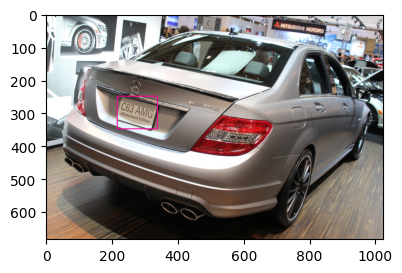

In [7]:
plot_predicted_data(prediction)

Now, to make sure the model performs well we will run an inference using an image from another dataset to evaluate the result

In [8]:
import os
prediction_2 = model.predict(source="C:/Users/MSI/Desktop/AutomaticPlateNumberRecognition/images/test/Cars412.png",conf=0.15, iou=0.3, classes=[0])


image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\Cars412.png: 384x640 1 license_plate, 52.1ms
Speed: 2.3ms preprocess, 52.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


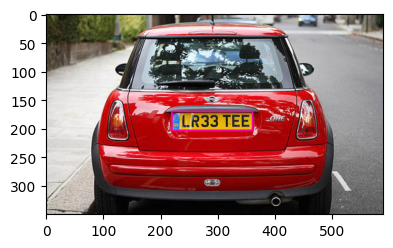

In [11]:
plot_predicted_data(prediction_2)

as shown in the figures, the YOLOv8 model works fine after fine-tuning on the test set and on other datasets 

In [18]:
prediction = model.predict(source='images/Test2.png',conf=0.15, iou=0.3, classes=[0])


image 1/1 c:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\Test2.png: 512x640 1 license_plate, 98.8ms
Speed: 2.0ms preprocess, 98.8ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)


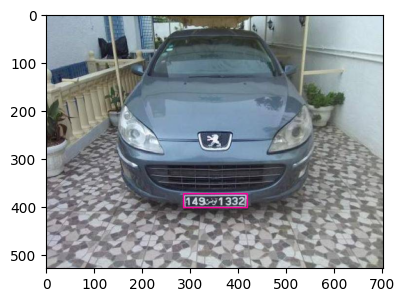

In [19]:
plot_predicted_data(prediction)

In [12]:
print(prediction_2[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.6136])
data: tensor([[220.5130, 170.8055, 361.4674, 203.7204,   0.6136,   0.0000]])
id: None
is_track: False
orig_shape: (350, 590)
shape: torch.Size([1, 6])
xywh: tensor([[290.9902, 187.2630, 140.9544,  32.9149]])
xywhn: tensor([[0.4932, 0.5350, 0.2389, 0.0940]])
xyxy: tensor([[220.5130, 170.8055, 361.4674, 203.7204]])
xyxyn: tensor([[0.3738, 0.4880, 0.6127, 0.5821]])


In [ ]:
# %pip install easyocr

  Using cached easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached scikit_image-0.24.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached imageio-2.36.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached easyocr-1.7.2-py3-none-any.whl (2.9 MB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached scikit_image-0.24.0-cp310-cp310-win_amd64.whl (12.9 MB)
Using cached imageio-2.36.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


[220.51300048828125, 170.80552673339844, 361.4673767089844, 203.72044372558594, 0.6136370897293091, 0.0]


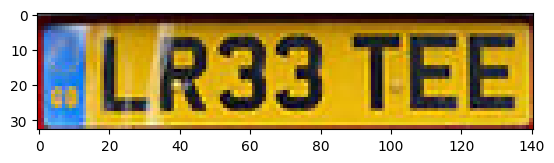

In [14]:
detection_list=[]
image_path_2='C:/Users/MSI/Desktop/AutomaticPlateNumberRecognition/images/test/Cars412.png'
#vehicles=[2,3,5,7]
def get_image(img_path):
    img = cv2.imread(img_path)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

for license_plate in prediction_2[0].boxes.data.tolist():
    print(license_plate)
    x1,y1,x2,y2,score,class_id= license_plate
    frame=get_image(image_path_2)
    cropped_license_plate=frame[int(y1): int(y2), int(x1): int(x2), :]
    cropped_license_plate_pro= cv2.cvtColor(cropped_license_plate, cv2.COLOR_BGR2RGB)
    plt.imshow (cropped_license_plate_pro)
    

In [15]:
import easyocr

reader = easyocr.Reader(['ar','en'])

# def read_license_plate(license_plate_image):
#     return a, b 
# license_plate_text, license_plate_score=read_license_plate(cropped_license_plate_pro)
    

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [16]:
def read_license_plate(license_plate_image):
    detections= reader.readtext(license_plate_image)
    for detection in detections:
        bbox, text, score= detection
        text= text.upper().replace(' ','')
        return text, score
     
license_plate_text, license_plate_score=read_license_plate(cropped_license_plate_pro)
print(license_plate_text)

[.R33T٤٤


<h2> Now we will use Tesseract to compare performance</h2>

In [ ]:
#!pip install tesseract

     ----------------                       20.2/45.6 MB 131.1 kB/s eta 0:03:14


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
   

In [ ]:
#!pip install pytesseract

In [17]:
import cv2
import pytesseract

In [36]:
from PIL import Image
def extract_license_plate(image_path):
    # Preprocess the image
    #processed_image = preprocess_image(image_path)
    pil_image = Image.fromarray(image_path) 

    # Use Tesseract to do OCR on the processed image
    text = pytesseract.image_to_string(pil_image, config='--psm 8')
    
    return text

print(extract_license_plate(cropped_license_plate_pro))

aig



In [ ]:
#!tesseract --version

'tesseract' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

# Path to the Tesseract executable
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def detect_license_plate(image_path_):
    prediction_result = model.predict(source= image_path_,conf=0.15, iou=0.3, classes=[0])
    for license_plate in prediction_result[0].boxes.data.tolist():
        print(license_plate)
        x1,y1,x2,y2,score,class_id= license_plate
        frame=get_image(image_path_2)
        cropped_license_plate=frame[int(y1): int(y2), int(x1): int(x2), :]
        cropped_license_plate_processed= cv2.cvtColor(cropped_license_plate, cv2.COLOR_BGR2RGB)
        plt.imshow (cropped_license_plate_pro)
    return cropped_license_plate_processed

def improve_image_quality(image):
    # Convert to grayscale
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply bilateral filter to reduce noise and keep edges sharp
    denoised = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # # Sharpen the image
    # kernel = np.array([[0, -1, 0],
    #                    [-1, 5,-1],
    #                    [0, -1, 0]])
    # sharpened = cv2.filter2D(denoised, -1, kernel)
    
    # Apply edge detection
    edges = cv2.Canny(denoised, 100, 200)
    plt.imshow (edges)
    return edges

def extract_license_plate_number(image):
    
    processed_image = improve_image_quality(image)
    
    # Convert processed image to PIL format
    pil_image = Image.fromarray(processed_image)
    
    # Use Tesseract to do OCR on the processed image
    text = pytesseract.image_to_string(pil_image, config='--psm 8')
    
    return text




image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\Cars412.png: 384x640 1 license_plate, 38.1ms
Speed: 2.0ms preprocess, 38.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[220.51300048828125, 170.80552673339844, 361.4673767089844, 203.72044372558594, 0.6136370897293091, 0.0]
Extracted License Plate Number: WLR3S TEE



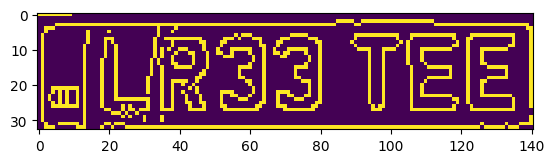

In [28]:
path_to_image='C:/Users/MSI/Desktop/AutomaticPlateNumberRecognition/images/test/Cars412.png'


# Load the image and detect the license plate
image= detect_license_plate(path_to_image)


# Extract license plate number
license_plate_number = extract_license_plate_number(image)
print(f'Extracted License Plate Number: {license_plate_number}')

In [63]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

# Path to the Tesseract executable
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def detect_license_plate(image_path_):
    prediction_result = model.predict(source= image_path_,conf=0.15, iou=0.3, classes=[0])
    for license_plate in prediction_result[0].boxes.data.tolist():
        print(license_plate)
        x1,y1,x2,y2,score,class_id= license_plate
        frame=get_image(image_path_)
        cropped_license_plate=frame[int(y1): int(y2), int(x1): int(x2), :]
        cropped_license_plate_processed= cv2.cvtColor(cropped_license_plate, cv2.COLOR_BGR2RGB)
        plt.imshow (cropped_license_plate_processed)
    return cropped_license_plate_processed

def improve_image_quality(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply bilateral filter to reduce noise and keep edges sharp
    denoised = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Sharpen the image
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(denoised, -1, kernel)
    
    # Increase contrast
    contrast = cv2.convertScaleAbs(sharpened, alpha=1.5, beta=0)
    
    # Apply edge detection
    edges = cv2.Canny(contrast, 100, 200)
    
    return edges

def extract_license_plate_number(image):
    # Improve image quality and detect edges
    processed_image = improve_image_quality(image)
    
    # Convert processed image to PIL format
    pil_image = Image.fromarray(processed_image)
    
    # Use Tesseract to do OCR on the processed image
    text = pytesseract.image_to_string(pil_image, config='--psm 8')
    
    return text


image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\Cars412.png: 384x640 1 license_plate, 37.6ms
Speed: 2.2ms preprocess, 37.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[220.51300048828125, 170.80552673339844, 361.4673767089844, 203.72044372558594, 0.6136370897293091, 0.0]
Extracted License Plate Number: RSS TEE!



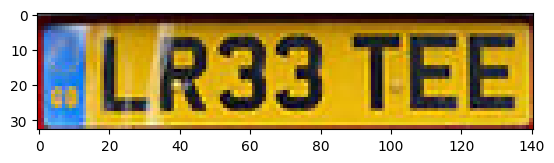

In [64]:
# Load the image and detect the license plate
image= detect_license_plate(path_to_image)

# dsiplay the image
processed_image= improve_image_quality(image)

# Extract license plate number
license_plate_number = extract_license_plate_number(image)
print(f'Extracted License Plate Number: {license_plate_number}')

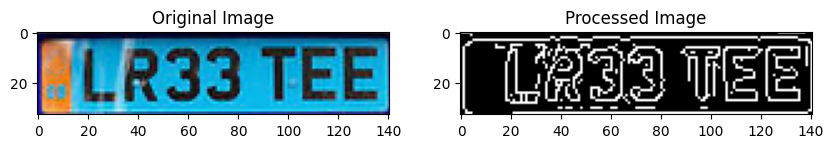

In [34]:
# Display the original and processed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Processed Image')
plt.imshow(processed_image, cmap='gray')

plt.show()

<h2>Using another alternative</h2>

In [81]:
from PIL import Image, ImageEnhance, ImageFilter
import pytesseract
pathh='C:/Users/MSI/Desktop/AutomaticPlateNumberRecognition/images/test/Cars418.png'
def extract_text_from_image(_path):
    # Load the image
    image= detect_license_plate(_path)

    pil_image = Image.fromarray(image)
    
    # Step 1: Convert to grayscale
    grayscale_image = pil_image.convert("L")
    
    # Step 2: Apply sharpening filter
    enhanced_image = grayscale_image.filter(ImageFilter.SHARPEN)
    
    # Step 3: Increase contrast
    enhancer = ImageEnhance.Contrast(enhanced_image)
    final_image = enhancer.enhance(2)  # Adjust contrast factor as needed
    final_image.show()
    # Step 4: Perform OCR with optimized settings
    extracted_text = pytesseract.image_to_string(final_image, config='--psm 7')
    
    return extracted_text



image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\Cars412.png: 384x640 1 license_plate, 40.6ms
Speed: 1.9ms preprocess, 40.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[220.51300048828125, 170.80552673339844, 361.4673767089844, 203.72044372558594, 0.6136370897293091, 0.0]
Extracted Text: 4LR33 TEE



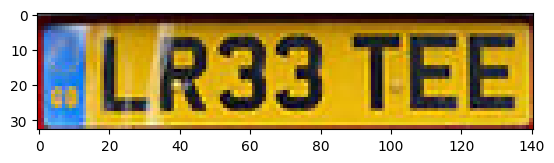

In [82]:
# Example usage
text = extract_text_from_image(path_to_image)
print("Extracted Text:", text)


image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\Cars418.png: 384x640 1 license_plate, 46.6ms
Speed: 1.7ms preprocess, 46.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[97.37976837158203, 62.42307662963867, 321.490234375, 164.69981384277344, 0.7512001991271973, 0.0]
Extracted Text: 


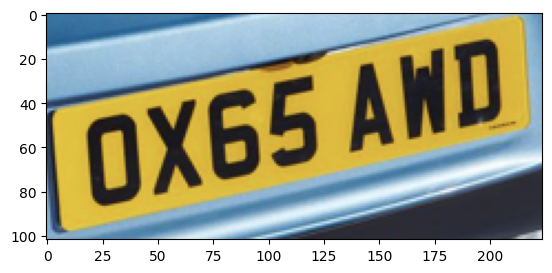

In [83]:
# Example usage
text2 = extract_text_from_image(pathh)
print("Extracted Text:", text2)


image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\Cars420.png: 480x640 1 license_plate, 49.3ms
Speed: 1.3ms preprocess, 49.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[109.83842468261719, 185.7470703125, 160.88134765625, 210.6464385986328, 0.7734186053276062, 0.0]
Extracted Text: SKIPGAS



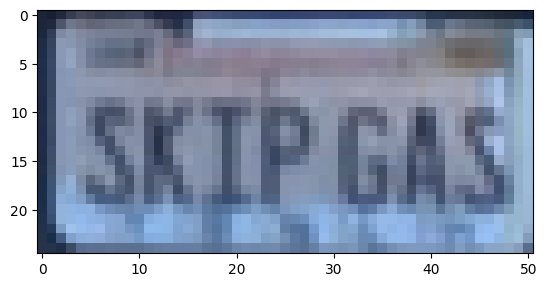

In [84]:
# Example usage
another_path='C:/Users/MSI/Desktop/AutomaticPlateNumberRecognition/images/test/Cars420.png'
text2 = extract_text_from_image(another_path)
print("Extracted Text:", text2)


image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\Cars423.png: 416x640 1 license_plate, 74.1ms
Speed: 1.0ms preprocess, 74.1ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
[165.4388427734375, 155.71360778808594, 284.2660827636719, 182.47409057617188, 0.7525965571403503, 0.0]
Extracted Text: 1 P3RV P



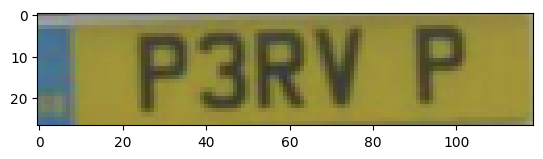

In [85]:
# Example usage
another_path='C:/Users/MSI/Desktop/AutomaticPlateNumberRecognition/images/test/Cars423.png'
text2 = extract_text_from_image(another_path)
print("Extracted Text:", text2)


image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\Test2.png: 512x640 1 license_plate, 65.1ms
Speed: 4.0ms preprocess, 65.1ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)
[286.2065734863281, 373.96307373046875, 419.804931640625, 402.76300048828125, 0.7079561948776245, 0.0]
Extracted Text: 449551332)



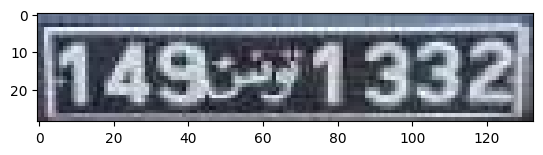

In [86]:
# Example usage
another_path='C:/Users/MSI/Desktop/AutomaticPlateNumberRecognition/images/Test2.png'
text2 = extract_text_from_image(another_path)
print("Extracted Text:", text2)


image 1/1 C:\Users\MSI\Pictures\Screenshots\Screenshot_20241212_012518.png: 320x640 1 license_plate, 64.7ms
Speed: 1.0ms preprocess, 64.7ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)
[67.6683349609375, 105.2369613647461, 307.56219482421875, 170.14642333984375, 0.8275265097618103, 0.0]
Extracted Text: 493 9 3654



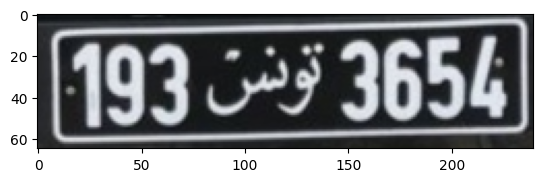

In [88]:
path="C:/Users/MSI/Pictures/Screenshots/Screenshot_20241212_012518.png"
text2 = extract_text_from_image(path)
print("Extracted Text:", text2)

<h2> multiple processing techniques</h2>


image 1/1 C:\Users\MSI\Desktop\AutomaticPlateNumberRecognition\images\test\Cars412.png: 384x640 1 license_plate, 38.8ms
Speed: 1.0ms preprocess, 38.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
[220.51300048828125, 170.80552673339844, 361.4673767089844, 203.72044372558594, 0.6136370897293091, 0.0]


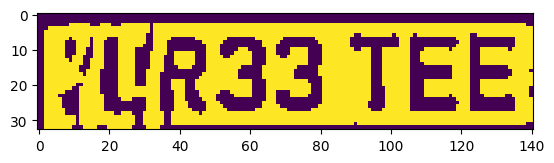

In [70]:
import cv2
import numpy as np

image= detect_license_plate(path_to_image)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Remove noise with GaussianBlur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)

# Perform morphological opening to clean small spots
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Enhance contrast using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_enhanced = clahe.apply(opened)

# Display and save results
plt.imshow( image)
plt.imshow( contrast_enhanced)
#cv2.imwrite("/mnt/data/Preprocessed_Image.png", contrast_enhanced)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
#image= detect_license_plate(_path)
    
pil_image = Image.fromarray(contrast_enhanced)
    
    # Step 1: Convert to grayscale
grayscale_image = pil_image.convert("L")
    
    # Step 2: Apply sharpening filter
enhanced_image = grayscale_image.filter(ImageFilter.SHARPEN)
    
    # Step 3: Increase contrast
enhancer = ImageEnhance.Contrast(enhanced_image)
final_image = enhancer.enhance(2)  # Adjust contrast factor as needed
final_image.show()
    
    # Step 4: Perform OCR with optimized settings
extracted_text = pytesseract.image_to_string(final_image, config='--psm 7')


In [72]:
print(extracted_text)

“UR33 TEE

